<a href="https://colab.research.google.com/github/aslikorkmaz48/NLP_14_Gunluk_Kamp/blob/main/Gun01_Metin_On_Isleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

:Kütüphanelerin yüklenmesi ve Türkçe morfolojik analiz için Zeyrek ayarları.


In [2]:
# Zeyrek kurulumu (Türkçe NLP için en iyisidir)
!pip install zeyrek

import zeyrek
analyzer = zeyrek.MorphAnalyzer()

text = "Yapay zekanın gelişimi istatistiksel verilerle hızlanıyor"
words = text.split()

for word in words:
    # Kelimenin kökünü bulur
    result = analyzer.lemmatize(word)
    print(f"Kelime: {word} -> Kök: {result[0][1][0]}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.0/931.0 kB 18.9 MB/s eta 0:00:00


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/turkish/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [3]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Örnek bir veri seti (Sanki 3 farklı Medium yazın varmış gibi)
data = [
    "yapay zeka gelecek vaat ediyor",
    "istatistik veri bilimi için temeldir",
    "gelecek veri ve zeka ile şekilleniyor"
]

# 1. Modeli oluştur (Türkçe karakter desteği için lowercase=True varsayılandır)
vectorizer = TfidfVectorizer()

# 2. Veriyi modele öğret ve sayılara dönüştür
X = vectorizer.fit_transform(data)

# 3. Sonucu daha rahat görmek için bir tabloya (DataFrame) dönüştürelim
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("Kelimelerin TF-IDF Puanları:")
print(df)

Kelimelerin TF-IDF Puanları:
     bilimi    ediyor   gelecek       ile  istatistik      için  temeldir  \
0  0.000000  0.490479  0.373022  0.000000    0.000000  0.000000  0.000000   
1  0.467351  0.000000  0.000000  0.000000    0.467351  0.467351  0.467351   
2  0.000000  0.000000  0.349498  0.459548    0.000000  0.000000  0.000000   

       vaat        ve      veri     yapay      zeka  şekilleniyor  
0  0.490479  0.000000  0.000000  0.490479  0.373022      0.000000  
1  0.000000  0.000000  0.355432  0.000000  0.000000      0.000000  
2  0.000000  0.459548  0.349498  0.000000  0.349498      0.459548  


In [5]:
import nltk
import zeyrek
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Gerekli paketleri indirelim (Hata almamak için her zaman başta dursun)
nltk.download('punkt_tab')
nltk.download('stopwords')

def metin_temizleyici(ham_metin):
    # 1. Küçük harfe çevir
    metin = ham_metin.lower()

    # 2. Kelimelere ayır (Tokenization)
    tokens = word_tokenize(metin)

    # 3. Noktalama işaretlerini ve sayıları at, sadece kelimeleri tut
    tokens = [kelime for kelime in tokens if kelime.isalpha()]

    # 4. Gereksiz kelimeleri (stopwords) temizle
    durak_kelimeler = set(stopwords.words('turkish'))
    temiz_tokens = [kelime for kelime in tokens if kelime not in durak_kelimeler]

    # 5. Zeyrek ile Kök Bulma (Lemmatization)
    analyzer = zeyrek.MorphAnalyzer()
    kokler = []
    for kelime in temiz_tokens:
        result = analyzer.lemmatize(kelime)
        # Zeyrek liste döner, biz en olası kökü (ilk sonuç) alıyoruz
        kokler.append(result[0][1][0])

    return " ".join(kokler) # Sonucu tekrar cümle haline getiriyoruz

# TEST EDELİM:
deneme_metni = "Yapay zeka verilerle beslenerek geleceği şekillendiriyor!"
sonuc = metin_temizleyici(deneme_metni)

print(f"Ham Metin: {deneme_metni}")
print(f"Aslı'nın Temizlediği Metin: {sonuc}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Ham Metin: Yapay zeka verilerle beslenerek geleceği şekillendiriyor!
Aslı'nın Temizlediği Metin: yapay zekâ veri Bes gelecek şekil


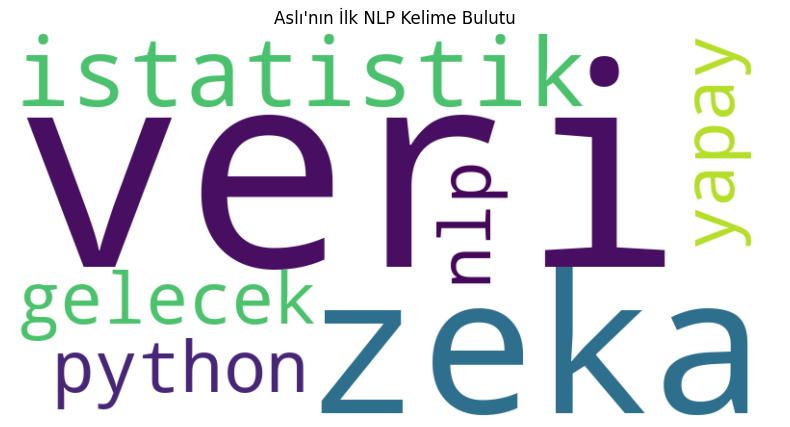

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Örnek büyükçe bir metin (Temizlediğin verileri buraya toplu veriyoruz)
ornek_kulliyat = "yapay zeka veri istatistik gelecek veri zeka veri python veri nlp istatistik zeka"

# Kelime bulutunu oluştur
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ornek_kulliyat)

# Görselleştir
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Eksenleri gizle
plt.title("Aslı'nın İlk NLP Kelime Bulutu")
plt.show()

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# 1. ELİMİZDEKİ VERİLER (Sanki bir veri setinden geliyormuş gibi)
yorumlar = [
    "bu yapay zeka harika bir teknoloji",
    "verilerle çalışmak çok sıkıcı ve zor",
    "istatistik öğrenmek geleceğimi aydınlatıyor",
    "bu kodlar asla çalışmıyor çok kötü"
]
# 1: Olumlu, 0: Olumsuz
etiketler = [1, 0, 1, 0]

# 2. SENİN TEMİZLİK MAKİNEN (Az önce yazdığımız fonksiyonu buraya dahil et)
# (Daha önce tanımladığın metin_temizleyici fonksiyonunu kullandığını varsayıyorum)
temiz_yorumlar = [metin_temizleyici(y) for y in yorumlar]

# 3. İSTATİSTİKSEL TEMSİL (TF-IDF)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(temiz_yorumlar)

# 4. MODELİ EĞİTME
model = LogisticRegression()
model.fit(X, etiketler)

# 5. ASLI'NIN MODELİ TEST EDİLİYOR
yeni_mesaj = "yapay zeka gelecek için çok heyecan verici"
yeni_temiz = metin_temizleyici(yeni_mesaj)
yeni_vektor = vectorizer.transform([yeni_temiz])

tahmin = model.predict(yeni_vektor)
olasilik = model.predict_proba(yeni_vektor) # Modelin ne kadar emin olduğunu söyler

# SONUCU YAZDIR
print(f"--- 1. GÜN MODEL SONUCU ---")
print(f"Mesaj: {yeni_mesaj}")
print(f"Tahmin: {'✅ OLUMLU' if tahmin[0] == 1 else '❌ OLUMSUZ'}")
print(f"Eminlik Oranı: %{round(max(olasilik[0])*100, 2)}")

--- 1. GÜN MODEL SONUCU ---
Mesaj: yapay zeka gelecek için çok heyecan verici
Tahmin: ✅ OLUMLU
Eminlik Oranı: %58.7
